# Condé Nast- DS Assignment

# Online Auction Robots Preventive Platform


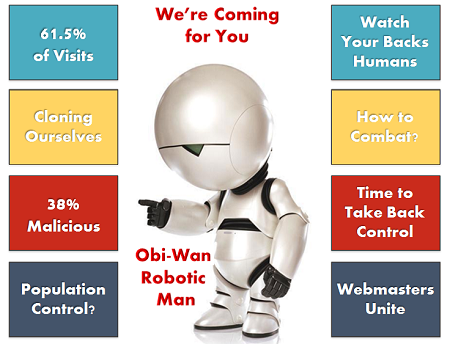

# Context

You'll be chasing down robots for an online auction site. Human bidders on the site are becoming increasingly frustrated
with their inability to win auctions vs. their software-controlled counterparts. 
As a result, usage from the site's core customer base is plummeting. In order to rebuild customer happiness, 
the site owners need to eliminate computer generated bidding from their auctions. 
Their attempt at building a model to identify these bids using behavioral data, including bid frequency over short periods of
time, has proven insufficient. 

# Objective

The goal is to identify “robots” which are making bids, helping the site owners easily flag these users for removal from their site to prevent unfair auction activity. 

Predictor "Outcome" with following values in dataset represents a binary classification problem and should use Classiffication algorithms to predict.

0--> Humans

1--> Robots

# ML Solution/Model

Loading necessary python libraries for AIML like numpy, pandas, matplotlib, seaborn, sklearn, scipy, time, warnings

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from scipy import stats
import time, datetime
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn import tree
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [3]:
import time
import datetime
import scipy.stats

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import auc, roc_curve, accuracy_score
from sklearn.externals.six import StringIO

# 1. Data Preprocessing

Given datasets for this problem statement

I. bids.csv- Bid dataset that includes 7.6 million bids on different auctions. The bids in this dataset are all made by mobile devices. Columns are: bid_id, bidder_id, auction, merchandise, device, time, country, ip, url

II. train.csv- Dataset includes a list of bidder information. Columns are: bidder_id, payment_account, address, outcome (=0/1)

# Load datasets and join dataframes

In [6]:
bids = pd.read_csv("C:/Users/Surya-Rekha/Downloads/Condenest/bids.csv")
train = pd.read_csv("C:/Users/Surya-Rekha/Downloads/Condenest/train.csv")

In [7]:
bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [8]:
train.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0


Hypothesis

Since our main goal is to identify "robots" which are making bids, let's consider the data clubbed with bids information and labelled data/predictor(outcome). 

So for this, we will join train.csv with bids.csv on "left" and then handle  the joined data incase of any missing bids information.

In [9]:
bid = pd.merge(train, bids, on='bidder_id', how='left')

Write to file and load into dataframe

In [10]:
bid.to_csv("bid.csv")
data = pd.read_csv("bid.csv")
data.head()

,Unnamed: 0,bidder_id,payment_account,address,outcome,bid_id,auction,merchandise,device,time,country,ip,url
0,0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0,85371.0,yitr4,home goods,phone35,9.759489e+15,ke,82.34.177.248,vasstdc27m7nks3
1,1,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0,274487.0,btpyy,home goods,phone1004,9.760249e+15,zm,202.130.71.167,vasstdc27m7nks3
2,2,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0,527436.0,kj2ko,home goods,phone4,9.762261e+15,ke,22.54.76.225,vasstdc27m7nks3
3,3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0,554135.0,1m5t8,home goods,phone4,9.762431e+15,ke,32.13.237.126,vasstdc27m7nks3
4,4,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0,607628.0,btpyy,home goods,phone4,9.762789e+15,ke,202.236.188.240,vasstdc27m7nks3


# 2. Exploratory Data Analysis

# Data Cleansing

In [11]:
data.isnull().any()

Unnamed: 0         False
bidder_id          False
payment_account    False
address            False
outcome            False
bid_id              True
auction             True
merchandise         True
device              True
time                True
country             True
ip                  True
url                 True
dtype: bool

We can see multiple missing values coming from bids. First we will look into bidder_id if no bids exists.

In [12]:
nobidsin_train = data[data['bid_id'].isnull()]['bidder_id'].unique()
len(nobidsin_train)

24

In [13]:
data[data['bidder_id'].isin(nobidsin_train)]['outcome']

17583      0
42424      0
129439     0
214915     0
221776     0
226432     0
255107     0
305088     0
333331     0
409451     0
654549     0
657208     0
788183     0
790914     0
794927     0
810369     0
883351     0
1018748    0
1019599    0
1021349    0
1123023    0
1139921    0
1217466    0
1465813    0
Name: outcome, dtype: int64

In [14]:
print('Number of  bidders having no bids: {}'.format(len(nobidsin_train)))

Number of  bidders having no bids: 24


Above 24 outcomes are labelled as 0 means they were all are humans. Since our point of interest is to detect robots, we can ignore this case. but for sake let's create a clean dataframe with no missing values.

In [15]:
# for all the missing value observation, drop it
bid = data[~data['bidder_id'].isin(nobidsin_train)]

In [16]:
pd.isnull(bid).any()

Unnamed: 0         False
bidder_id          False
payment_account    False
address            False
outcome            False
bid_id             False
auction            False
merchandise        False
device             False
time               False
country             True
ip                 False
url                False
dtype: bool

Still country has missing values, we will drop all missing values at a shot

In [17]:
bid.dropna(inplace = True)
bid.isnull().any()

C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Unnamed: 0         False
bidder_id          False
payment_account    False
address            False
outcome            False
bid_id             False
auction            False
merchandise        False
device             False
time               False
country            False
ip                 False
url                False
dtype: bool

In [18]:
# double check the missing value
pd.isnull(bid).any()

Unnamed: 0         False
bidder_id          False
payment_account    False
address            False
outcome            False
bid_id             False
auction            False
merchandise        False
device             False
time               False
country            False
ip                 False
url                False
dtype: bool

In [19]:
print(f"Total rows:          {len(bid)}")
print(f"Total bids:         {len(bid['bid_id'].unique())}")
print(f"Total bidders:      {len(bid['bidder_id'].unique())}")
print(f"Total payments:     {len(bid['payment_account'].unique())}")
print(f"Total addresses:     {len(bid['address'].unique())}")
print(f"Total auctions:     {len(bid['auction'].unique())}")
print(f"Total merchandises: {len(bid['merchandise'].unique())}")
print(f"Total devices:      {len(bid['device'].unique())}")
print(f"Total countries:     {len(bid['country'].unique())}")
print(f"Total IP's:          {len(bid['ip'].unique())}")
print(f"Total URL's:         {len(bid['url'].unique())}")

Total rows:          1463674
Total bids:         1463674
Total bidders:      1473
Total payments:     1473
Total addresses:     1473
Total auctions:     11688
Total merchandises: 10
Total devices:      4856
Total countries:     187
Total IP's:          535182
Total URL's:         378253


Let's check the bids made by human and robots for data imbalance if any

In [20]:
print(f"Total bids made by robots in data set: {len(bid[bid['outcome'] == 1])}")
print(f"Total bids made by humans in data set: {len(bid[bid['outcome'] == 0])}")

Total bids made by robots in data set: 150219
Total bids made by humans in data set: 1313455


Lot of imbalance occurs in data set.

There might be a need to do UnderSampling technique exclusively for human bidder samples all before training the model.

Then checking the features' ratio of robots and human:

In [21]:
print(f"Average bids per robot: %.0f" % float(len(
    bid[bid['outcome'] == 1])/len(bid[bid['outcome'] == 1]['bidder_id'].unique())))
print(f"Average bids per human:  %.0f" % float(len(
    bid[bid['outcome'] == 0])/len(bid[bid['outcome'] == 0]['bidder_id'].unique())))
print(f"Average bids per auction by robot: %.0f" % float(
    len(bid[bid['outcome'] == 1])/len(bid[bid['outcome'] == 1]['auction'].unique())))
print(f"Average bids per auction by human:  %.0f" % float(
    len(bid[bid['outcome'] == 0])/len(bid[bid['outcome'] == 0]['auction'].unique())))
print(f"Average bids per device by robot: %.0f" % float(
    len(bid[bid['outcome'] == 1])/len(bid[bid['outcome'] == 1]['device'].unique())))
print(f"Average bids per device by human:  %.0f" % float(
    len(bid[bid['outcome'] == 0])/len(bid[bid['outcome'] == 0]['device'].unique())))
print(f"Average bids per ip by robots: %.2f" % float(
    len(bid[bid['outcome'] == 1])/len(bid[bid['outcome'] == 1]['ip'].unique())))
print(f"Average bids per ip by human:  %.2f" % float(
    len(bid[bid['outcome'] == 0])/len(bid[bid['outcome'] == 0]['ip'].unique())))
print(f"Average bids per url by robot: %.2f" % float(
    len(bid[bid['outcome'] == 1])/len(bid[bid['outcome'] == 1]['url'].unique())))
print(f"Average bids per url by human:  %.2f" % float(
    len(bid[bid['outcome'] == 0])/len(bid[bid['outcome'] == 0]['url'].unique())))

Average bids per robot: 2146
Average bids per human:  936
Average bids per auction by robot: 34
Average bids per auction by human:  116
Average bids per device by robot: 69
Average bids per device by human:  293
Average bids per ip by robots: 1.90
Average bids per ip by human:  2.80
Average bids per url by robot: 4.54
Average bids per url by human:  3.80


There are distinct bids made by human and bots per auction, per device.

# 3. Feature Engineering

In [22]:
def ent(data):
    """
    entropy is calculated with the following steps:
        1. compute the probabilities
        2. fit in the entropy formula
    """
    p_data = data.value_counts()/len(data)  # calculates the probabilities
    # input probabilities to get the entropy
    entropy = scipy.stats.entropy(p_data)
    return entropy

In [23]:
# bidding time difference per user (bidder_id)
bid = bid.sort_values(by=['time'])
bid['timediffs'] = bid.groupby('bidder_id')['time'].transform(pd.Series.diff)

# number of bids a user made per auction
bids_per_auction = bid.groupby(['auction', 'bidder_id']).size()
bids_per_auction = bids_per_auction.to_frame()

# proportion of bots for each country
pbots_country = bid[bid['outcome'] == 1].groupby(
    'country').size()/bid.groupby('country').size()
pbots_country = pbots_country.fillna(0)
pbots_country = pbots_country.to_frame()

# proportion of bots per device
pbots_device = bid[bid['outcome'] == 1].groupby(
    'device').size()/bid.groupby('device').size()
pbots_device = pbots_device.fillna(0)
pbots_device = pbots_device.to_frame()

# number of unique ip to number of bids ratio
ip_bids_ratio = bid.groupby('bidder_id')['ip'].nunique(
)/bid.groupby('bidder_id')['bid_id'].nunique()
ip_bids_ratio = ip_bids_ratio.to_frame()

# mean per auction url entropy for each user
# Input a pandas series
auction_url_entropy = bid.groupby(['auction', 'bidder_id'])['url'].apply(ent)
auction_url_entropy = auction_url_entropy.groupby(
    'bidder_id').mean().reset_index()

In [24]:
# Merge the derived features back to dataframe
bid = pd.merge(bid, bids_per_auction, on=['auction', 'bidder_id'], how='left')
bid = pd.merge(bid, pbots_country, on='country', how='left')
bid = pd.merge(bid, pbots_device, on='device', how='left')
bid = pd.merge(bid, ip_bids_ratio, on='bidder_id', how='left')
bid = pd.merge(bid, auction_url_entropy, on='bidder_id', how='left')

In [25]:
bid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463674 entries, 0 to 1463673
Data columns (total 19 columns):
Unnamed: 0         1463674 non-null int64
bidder_id          1463674 non-null object
payment_account    1463674 non-null object
address            1463674 non-null object
outcome            1463674 non-null int64
bid_id             1463674 non-null float64
auction            1463674 non-null object
merchandise        1463674 non-null object
device             1463674 non-null object
time               1463674 non-null float64
country            1463674 non-null object
ip                 1463674 non-null object
url_x              1463674 non-null object
timediffs          1462201 non-null float64
0_x                1463674 non-null int64
0_y                1463674 non-null float64
0_x                1463674 non-null float64
0_y                1463674 non-null float64
url_y              1463674 non-null float64
dtypes: float64(7), int64(3), object(9)
memory usage: 223.3+ MB


After the feature "timediffs" columns names have been changed, hence setting dataframe to proper column names

In [26]:
bid.columns = ['Unnamed: 0', 'bidder_id', 'payment_account', 'address', 'outcome',
               'bid_id', 'auction', 'merchandise', 'device', 'time', 'country',
               'ip', 'url', 'timediffs', 'bids_per_auction', 'pbots_country', 'pbots_device',
               'ip_bids_ratio', 'auction_url_entropy']

In [27]:
bid = pd.concat([bid.iloc[:, 4], bid.iloc[:, -6:]], axis=1)
bid.to_csv("featured.csv")
bid = pd.read_csv("featured.csv")
bid = bid.iloc[:, 1:8]

In [28]:
bid.head()

,outcome,timediffs,bids_per_auction,pbots_country,pbots_device,ip_bids_ratio,auction_url_entropy
0,0,NaN,368,0.017642,0.003413,0.178624,1.463760
1,1,NaN,15,0.075552,0.028097,0.327745,0.479477
2,0,NaN,2,0.150556,0.230428,0.531639,1.084777
3,0,NaN,15452,0.044114,0.056947,0.583490,0.885604
4,0,NaN,9341,0.075552,0.099914,0.640411,0.541644


# 4. Data Visualization using Seaborn and matplotlib

In [29]:
bots = bid.loc[bid.outcome == 1]
human = bid.loc[bid.outcome == 0]

# Distribution plots

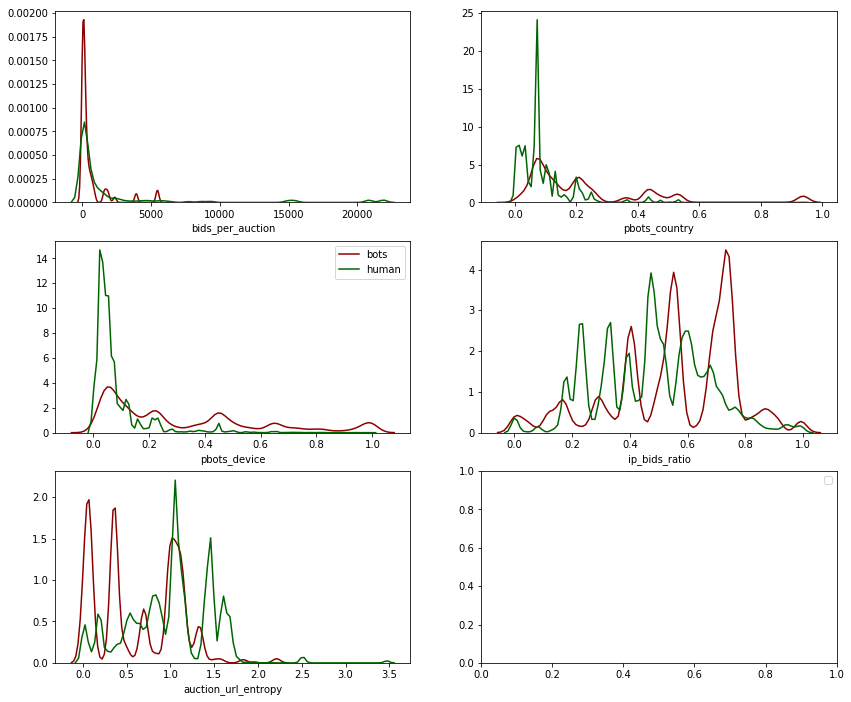

In [32]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharex=False)
sns.distplot(bots['bids_per_auction'], hist=False, kde=True,
             bins=int(180/5), color='darkred',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 0])
sns.distplot(human['bids_per_auction'], hist=False, kde=True,
             bins=int(180/5), color='darkgreen',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 0])

sns.distplot(bots['pbots_country'], hist=False, kde=True,
             bins=int(180/5), color='darkred',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 1])
sns.distplot(human['pbots_country'], hist=False, kde=True,
             bins=int(180/5), color='darkgreen',
             kde_kws={'linewidth': 1.5}, ax=axes[0, 1])

sns.distplot(bots['pbots_device'], hist=False, kde=True,
             bins=int(180/5), color='darkred', label='bots',
             kde_kws={'linewidth': 1.5}, ax=axes[1, 0])
sns.distplot(human['pbots_device'], hist=False, kde=True,
             bins=int(180/5), color='darkgreen', label='human',
             kde_kws={'linewidth': 1.5}, ax=axes[1, 0])

sns.distplot(bots['ip_bids_ratio'], hist=False, kde=True,
             bins=int(180/5), color='darkred',
             kde_kws={'linewidth': 1.5}, ax=axes[1, 1])
sns.distplot(human['ip_bids_ratio'], hist=False, kde=True,
             bins=int(180/5), color='darkgreen',
             kde_kws={'linewidth': 1.5}, ax=axes[1, 1])

sns.distplot(bots['auction_url_entropy'], hist=False, kde=True,
             bins=int(180/5), color='darkred',
             kde_kws={'linewidth': 1.5}, ax=axes[2, 0])
sns.distplot(human['auction_url_entropy'], hist=False, kde=True,
             bins=int(180/5), color='darkgreen',
             kde_kws={'linewidth': 1.5}, ax=axes[2, 0])

#sns.distplot(bots['timediffs'], hist=False, kde=True,
             #bins=int(180/5), color='darkred',
             #kde_kws={'linewidth': 1.5}, ax=axes[2, 1])
#sns.distplot(human['timediffs'], hist=False, kde=True,
             #bins=int(180/5), color='darkgreen',
             #kde_kws={'linewidth': 1.5}, ax=axes[2, 1])
plt.legend(['bots', 'human'])
plt.show()

Due to NaN values of "timediff" column, plotting couldn't be done hence ignoring the column

# Heat Map

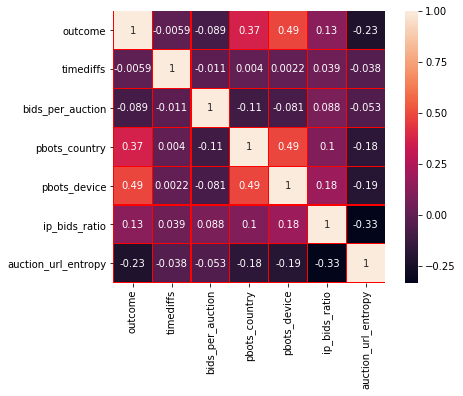

In [33]:
# Plot the correlation matrix for the numerical values
# Correlation matrix
plt.figure(figsize=(7,5))
sns.heatmap(bid.corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='red', annot=True)
plt.show()

Heatmap is the correlation matrix of our engineered features. "White" color depicts two variables are highly positively correlated with each other. "Dark black" color in this heatmap indicates that two features are highly negatively correlated with each other. 

From this plot, we can infer that proportion of bots per device, proportion of bots for each country and  number of unique ip to number of bids ratio are highly positively correlated with our outcome. While mean per auction url entropy for each user are highly negatively correlated with our outcome. However, the variable time differ per user does not show clearly corrrelation with our outcome. Hence we can ignore the column "timediffs".

Since diagonal columns associate with same feature/column, the matrix always have a value "1" 

# Box Plots

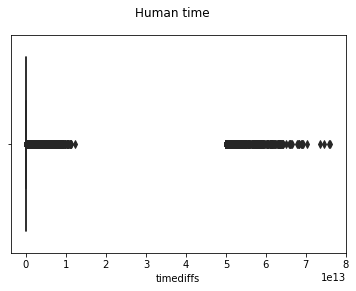

In [34]:
plt.suptitle('Human time')
sns.boxplot(human['timediffs'],color="green")

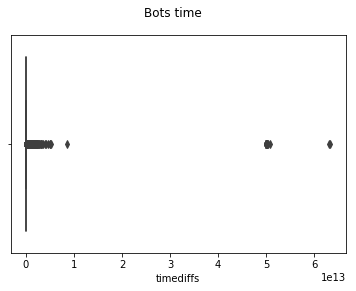

In [35]:
plt.suptitle('Bots time')
sns.boxplot(bots['timediffs'])

# Bar Charts

0    0.897369
1    0.102631
Name: outcome, dtype: float64


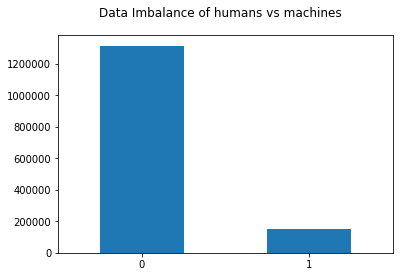

In [36]:
imbalance= bid['outcome'].value_counts(normalize=True)
print(imbalance)

bid.groupby(["outcome"]).count()
plt.suptitle('Data Imbalance of humans vs machines')
pd.value_counts(bid["outcome"]).plot(kind='bar', rot=0)

# 4. Split datasets

In [37]:
bid_train, bid_test = train_test_split(bid, test_size=0.2, random_state=7)

# Under sampling

Undersample the human bidder samples in the trainset to keep the data balance.

In [38]:
bots_train = bid_train.loc[bid_train.outcome == 1]
human_train = bid_train.loc[bid_train.outcome == 0]
human_sample = human_train.sample(n = len(bots_train))
bid_train_balance = pd.concat([bots_train, human_sample])

In [39]:
X_train = bid_train_balance.iloc[:, -5:]
X_test = bid_test.iloc[:, -5:]
y_train = bid_train_balance['outcome']
y_test = bid_test['outcome']

# 5. Modeling

1. Fitting Model in mathematical space
2. Cross Validating model with best hyper parameters.

# Decision Tree

In [40]:
dt = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(3, 6),
    'max_leaf_nodes': range(10, 15),
    'min_samples_split': range(2, 6)
}

dt_cv = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
dt_cv.fit(X_train, y_train)
print(dt_cv.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 14, 'min_samples_split': 2}


In [41]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth = 4, max_leaf_nodes = 14, min_samples_split=2)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=14,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Random Forest

In [42]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Gradient Boosting

In [43]:
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

# Ada Boost

In [44]:
adb = AdaBoostClassifier(n_estimators=100)
adb.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

# SVM

In [45]:
#svc = SVC(C=1.0, kernel = 'rbf')
#svc.fit(X_train, y_train)

# 6. Feature Importance

Feature importance of Random Forest Model


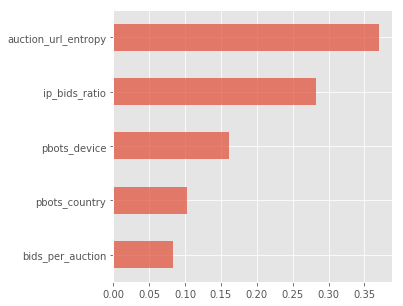

In [46]:
# Check feature importance and display in bar plot.
print('Feature importance of Random Forest Model')
plt.style.use('ggplot')
fig = plt.figure(figsize=(5, 5))
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nsmallest(5).plot(kind='barh', alpha=0.7)
fig.savefig('rf_feature.png')

# 7. Evaluation

# Predictions

Decision Tree, Random Forest, GradientBoosting, AdaBoost

In [47]:
# Prediction of classess
y_dt_pred = dtree.predict(X_test)
y_rf_pred = rf.predict(X_test)
y_gb_pred = gb.predict(X_test)
y_adb_pred = adb.predict(X_test)

# Metrics

Accuracy

In [48]:
print("Decision Tree Model Accuracy: {}%".format(round(accuracy_score(y_dt_pred, y_test)*100,2)))
print("Random Forest Model Accuracy: {}%".format(round(accuracy_score(y_rf_pred, y_test)*100,2)))
print("Gradient Boosting Model Accuracy: {}%".format(round(accuracy_score(y_gb_pred, y_test)*100,2)))
print("Ada Boost Model Accuracy: {}%".format(round(accuracy_score(y_adb_pred, y_test)*100,2)))

Decision Tree Model Accuracy: 88.07%
Random Forest Model Accuracy: 99.99%
Gradient Boosting Model Accuracy: 97.47%
Ada Boost Model Accuracy: 94.1%


Recall, Precision, F1-score

In [49]:
print('1. Classification report for Decision Tree model: \n', classification_report(y_test, y_dt_pred))
print('\n')
print('2. Classification report for Random Forest model: \n', classification_report(y_test, y_rf_pred))
print('\n')
print('3. Classification report for Gradient Boosting model: \n', classification_report(y_test, y_gb_pred))
print('\n')
print('4. Classification report for Ada Boos model: \n', classification_report(y_test, y_adb_pred))

1. Classification report for Decision Tree model: 
               precision    recall  f1-score   support

           0       0.97      0.89      0.93    262895
           1       0.45      0.78      0.57     29840

   micro avg       0.88      0.88      0.88    292735
   macro avg       0.71      0.84      0.75    292735
weighted avg       0.92      0.88      0.89    292735



2. Classification report for Random Forest model: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    262895
           1       1.00      1.00      1.00     29840

   micro avg       1.00      1.00      1.00    292735
   macro avg       1.00      1.00      1.00    292735
weighted avg       1.00      1.00      1.00    292735



3. Classification report for Gradient Boosting model: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    262895
           1       0.81      0.98      0.89     29840

   micro avg      

# AUC

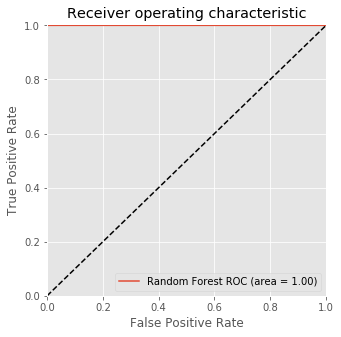

In [50]:
y_rf_score = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _dt = roc_curve(y_test, y_rf_score)
roc_rf_auc = auc(fpr_rf, tpr_rf)

fig = plt.figure(figsize=(5, 5))
plt.plot(fpr_rf, tpr_rf, label='Random Forest ROC (area = %0.2f)' % roc_rf_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
fig.savefig('roc_rf_auc.png')

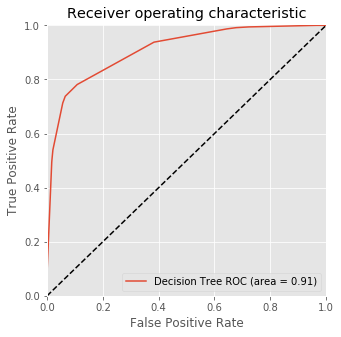

In [51]:
y_dt_score = dtree.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _dt = roc_curve(y_test, y_dt_score)
roc_dt_auc = auc(fpr_dt, tpr_dt)

fig = plt.figure(figsize=(5, 5))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree ROC (area = %0.2f)' % roc_dt_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.005])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
fig.savefig('roc_dt_auc.png')

# Algorithmic Comparision

In [52]:
# Prepare models
models = []
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Gradient Boost', GradientBoostingClassifier()))
models.append(('Ada Boost', AdaBoostClassifier()))
print(models)

[('Decision Tree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')), ('Random Forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)), ('Gradient Boost', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, ma

In [53]:
# Evaluate each model w.r.t 'recall'
results = []
names = []
scoring = 'recall'

In [54]:
for name, model in models:
        kfold = KFold(n_splits=10, random_state=7)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        #print(results)
        msg = "%s: %f, (%f)" % (name, cv_results.mean(), cv_results.std())
        print('\n {}'.format(msg))

C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is i


 Decision Tree: 0.499718, (0.499718)


C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\skl


 Random Forest: 0.499597, (0.499597)


C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is i


 Gradient Boost: 0.485903, (0.485904)


C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)



 Ada Boost: 0.445177, (0.445201)


C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


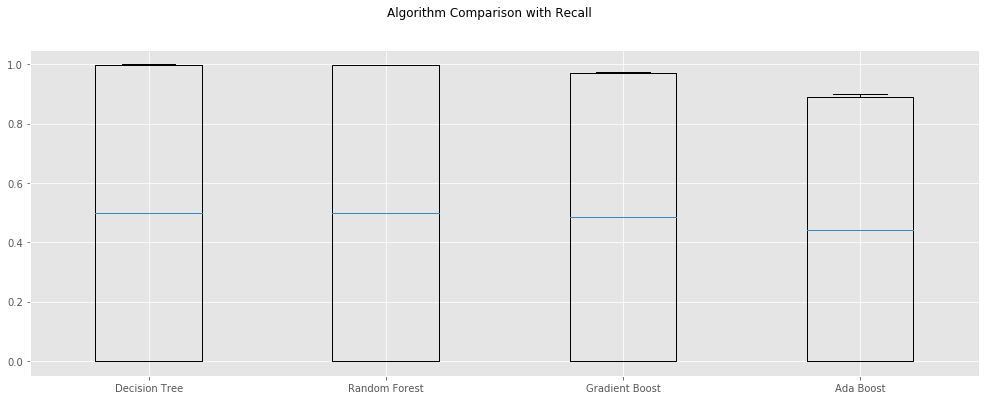

In [55]:
# Boxplot algorithm comparison
fig = plt.figure(figsize=(17,6))
fig.suptitle('Algorithm Comparison with Recall')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [56]:
# Evaluate each model w.r.t 'accuracy'
results = []
names = []
scoring = 'accuracy'

In [57]:
for name, model in models:
        kfold = KFold(n_splits=10, random_state=7)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        #print(results)
        msg = "%s: %f, (%f)" % (name, cv_results.mean(), cv_results.std())
        print('\n {}'.format(msg))


 Decision Tree: 0.999086, (0.000398)


C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Surya-Rekha\Anaconda3\lib\site-packages\skl


 Random Forest: 0.999381, (0.000253)

 Gradient Boost: 0.969908, (0.002401)

 Ada Boost: 0.886060, (0.006661)


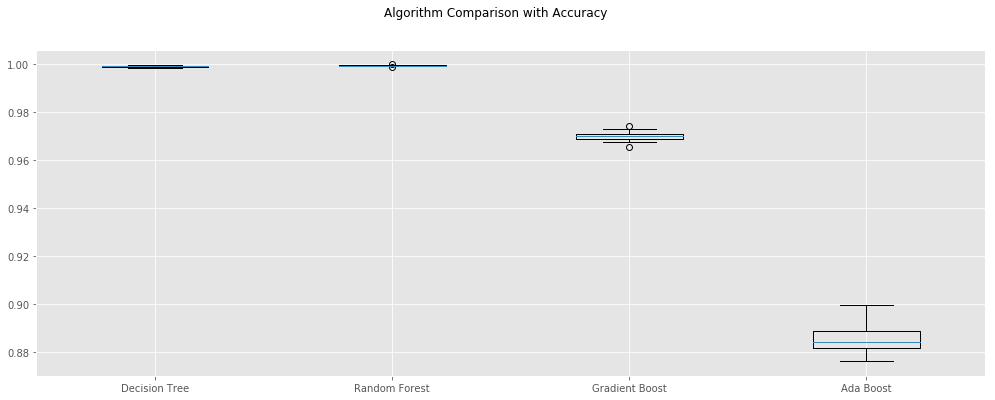

In [59]:
# Boxplot algorithm comparison
fig = plt.figure(figsize=(17,6))
fig.suptitle('Algorithm Comparison with Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 8. Conclusion

"Random Forest" and "Decision Tree" has best performance, in terms of accuracy and recall metrics.

# 9. MySubmissions.csv file generation for model predictions

In [60]:
y_rf_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [61]:
submissions_df = pd.DataFrame()

In [62]:
data.head()

,Unnamed: 0,bidder_id,payment_account,address,outcome,bid_id,auction,merchandise,device,time,country,ip,url
0,0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0,85371.0,yitr4,home goods,phone35,9.759489e+15,ke,82.34.177.248,vasstdc27m7nks3
1,1,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0,274487.0,btpyy,home goods,phone1004,9.760249e+15,zm,202.130.71.167,vasstdc27m7nks3
2,2,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0,527436.0,kj2ko,home goods,phone4,9.762261e+15,ke,22.54.76.225,vasstdc27m7nks3
3,3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0,554135.0,1m5t8,home goods,phone4,9.762431e+15,ke,32.13.237.126,vasstdc27m7nks3
4,4,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0,607628.0,btpyy,home goods,phone4,9.762789e+15,ke,202.236.188.240,vasstdc27m7nks3


In [63]:
data.dropna(inplace = True)

In [64]:
A = data.drop(columns = ["outcome"], axis=1)
B = data["outcome"]

In [65]:
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=5)

In [66]:
A_test.shape

(292735, 12)

In [67]:
A_test.head()

,Unnamed: 0,bidder_id,payment_account,address,bid_id,auction,merchandise,device,time,country,ip,url
782680,782680,d2704c8bb6ebbf13e08f37131382b126wy4yc,308f53abff7d25a618069ec8b74feecexmpf3,a3d2de7675556553a5f08e4c88d2c228djz03,1575823.0,60iru,mobile,phone344,9.768438e+15,in,178.150.69.212,cdmv1tsxyp771p0
864752,864752,047558bebab9292a5d4c85d6ee768784j2hdd,b765a299e6a1cc7b91e98414a79932b4rmt3h,bccfc8bd38088af1275a4c2d2ded2053waj6b,3739178.0,jqx39,jewelry,phone45,9.638508e+15,in,203.57.59.176,zq7eqpcrd59ly5p
859516,859516,99ca795998fb781a42d85f1abeb50482yzffz,7627ad97205ba9430250ac70ccfaaea634d2x,becb985bf6318e81ceaf551b3c632f5c3ao89,2342709.0,jefix,mobile,phone45,9.772839e+15,bd,227.155.142.38,jfha7p70vjpf623
298152,298152,76218e14c379c12d599dae9e1c00b61a3i5b2,a3d2de7675556553a5f08e4c88d2c228sjo4q,ca8d4b018cb62966eebb2974f5a83b4fstk6z,6008051.0,3rqiy,sporting goods,phone4,9.700050e+15,lk,213.68.148.35,vasstdc27m7nks3
946876,946876,cb557e4675bf4f36f93ef5599adff545nz370,491396631d5eb6a31b92dcf78c034ac36v2vx,02b646e40106435e0d293cebd157c5931ebq0,6196995.0,7y2pw,mobile,phone2,9.700724e+15,th,249.21.212.233,qi71rcp2ktibbnr


In [68]:
submissions_df["bidder_id"] = A_test["bidder_id"]

In [69]:
submissions_df["predictions"] = y_rf_pred

In [70]:
submissions_df.head(100)

,bidder_id,predictions
782680,d2704c8bb6ebbf13e08f37131382b126wy4yc,0
864752,047558bebab9292a5d4c85d6ee768784j2hdd,0
859516,99ca795998fb781a42d85f1abeb50482yzffz,0
298152,76218e14c379c12d599dae9e1c00b61a3i5b2,0
946876,cb557e4675bf4f36f93ef5599adff545nz370,0
208639,dd055846eb553ab8e953b084f2048d53bdqec,0
409268,cffb5f3c1f4ca815d0f643fcb2f2f316beod4,0
299376,76218e14c379c12d599dae9e1c00b61a3i5b2,1
1418394,0b3d5f829d18ba30d967fceecb58821c3oeqa,0
75058,d65efaa8129a85f85bf909e5abde8c3628gfv,0


In [71]:
submissions_df.to_csv("MySubmissions.csv")